<a href="https://colab.research.google.com/github/anmolaman20/DataScience_DailyLearning/blob/main/KMeans_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [56]:
centroid = [(-5,-5),(5,5),(5,-5),(-5,5)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std = cluster_std,centers = centroid,n_features=2,random_state=1)

In [57]:
X.shape,y.shape

((200, 2), (200,))

In [58]:
y

array([0, 3, 2, 2, 3, 3, 2, 1, 3, 2, 0, 3, 2, 0, 3, 2, 3, 2, 3, 3, 2, 0,
       2, 0, 0, 2, 0, 1, 2, 3, 1, 3, 1, 3, 2, 2, 1, 3, 0, 3, 0, 2, 2, 0,
       1, 1, 2, 3, 1, 3, 0, 0, 1, 2, 1, 3, 3, 1, 3, 1, 3, 2, 2, 1, 0, 1,
       2, 0, 3, 2, 3, 1, 2, 0, 3, 1, 3, 1, 0, 2, 2, 1, 3, 0, 1, 0, 1, 3,
       1, 3, 1, 1, 2, 0, 2, 2, 1, 2, 0, 1, 3, 0, 0, 1, 0, 0, 2, 0, 1, 1,
       2, 1, 3, 3, 2, 1, 2, 3, 1, 0, 0, 3, 2, 1, 2, 0, 2, 3, 0, 2, 2, 3,
       0, 0, 3, 1, 3, 0, 2, 2, 2, 0, 3, 0, 0, 1, 0, 1, 3, 0, 1, 0, 1, 1,
       0, 2, 3, 1, 3, 2, 0, 1, 3, 2, 1, 0, 3, 0, 0, 1, 1, 3, 1, 0, 0, 2,
       1, 3, 0, 1, 1, 3, 3, 3, 2, 0, 2, 2, 1, 3, 2, 2, 0, 0, 2, 0, 1, 3,
       3, 1])

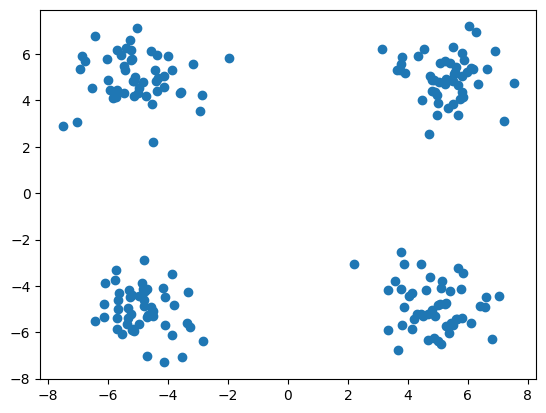

In [59]:
plt.scatter(X[:,0],X[:,1])

In [60]:
import random
class KMeans:
  def __init__(self,n_clusters = 2,max_iter=100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None

  def fit_predict(self,X):
    random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
    self.centroids = X[random_index]

    for i in range(self.max_iter):
      #assign cluster
      #move centroids
      #check final

      cluster_group = self.assign_clusters(X)
      old_centroids = self.centroids
      self.centroids = self.move_centroids(X,cluster_group)
      if np.array_equal(old_centroids,self.centroids):
        break
    return cluster_group



  def assign_clusters(self,X):
    cluster_group = []
    distances = []

    for row in X:
      for centroid in self.centroids:
        distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
      # print(distances)
      index_pos = distances.index(min(distances))
      cluster_group.append(index_pos)
      distances.clear()
    return np.array(cluster_group)

  def move_centroids(self,X,cluster_group):
    new_centroids = []
    cluster_types = np.unique(cluster_group)
    for type_ in cluster_types:
      new_centroids.append(X[cluster_group==type_].mean(axis=0))
    return new_centroids


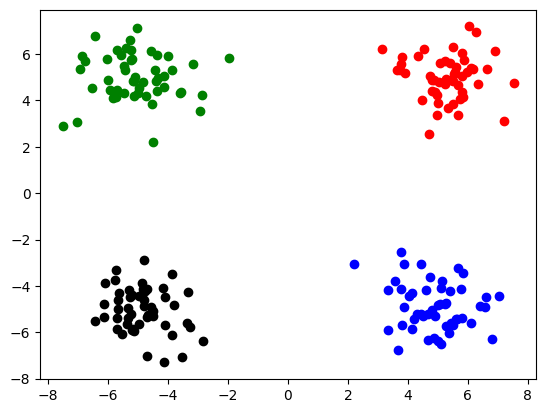

array([1, 2, 3, 3, 2, 2, 3, 0, 2, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 2, 3, 1,
       3, 1, 1, 3, 1, 0, 3, 2, 0, 2, 0, 2, 3, 3, 0, 2, 1, 2, 1, 3, 3, 1,
       0, 0, 3, 2, 0, 2, 1, 1, 0, 3, 0, 2, 2, 0, 2, 0, 2, 3, 3, 0, 1, 0,
       3, 1, 2, 3, 2, 0, 3, 1, 2, 0, 2, 0, 1, 3, 3, 0, 2, 1, 0, 1, 0, 2,
       0, 2, 0, 0, 3, 1, 3, 3, 0, 3, 1, 0, 2, 1, 1, 0, 1, 1, 3, 1, 0, 0,
       3, 0, 2, 2, 3, 0, 3, 2, 0, 1, 1, 2, 3, 0, 3, 1, 3, 2, 1, 3, 3, 2,
       1, 1, 2, 0, 2, 1, 3, 3, 3, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 3, 2, 0, 2, 3, 1, 0, 2, 3, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 3,
       0, 2, 1, 0, 0, 2, 2, 2, 3, 1, 3, 3, 0, 2, 3, 3, 1, 1, 3, 1, 0, 2,
       2, 0])

In [63]:
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)
plt.scatter(X[y_means==0,0],X[y_means==0,1],color='red')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color='black')
plt.scatter(X[y_means==2,0],X[y_means==2,1],color='green')
plt.scatter(X[y_means==3,0],X[y_means==3,1],color='blue')
plt.show()
y_means